In [1]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/Users/Simon/GIT/GPlatesClassStruggle/')

from reconstruction_classes import *
from raster_reconstruction_classes import *
from worselands_utils import grdcontour2feature

%matplotlib inline
%load_ext autoreload
%autoreload 2



(721,) (361,) (361, 721)


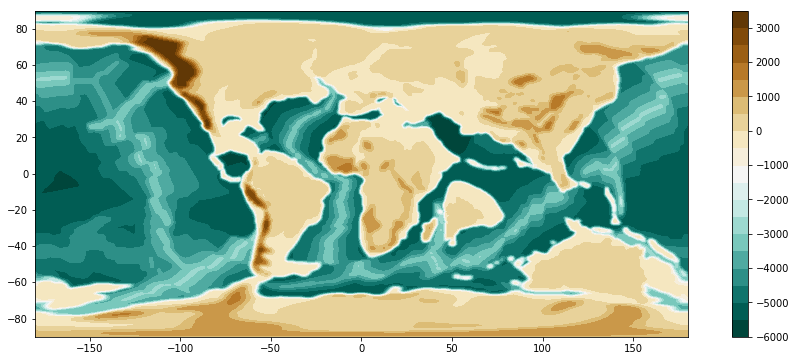

In [2]:
grdfile_template = '/Users/Simon/cloudstor/Shared/Paleotopography_Grids/paleotopobathy_smooth_%0.2fMa.nc'

reconstruction_time = 71
ptopo = GplatesRaster(grdfile_template % reconstruction_time)

print ptopo.gridX.shape, ptopo.gridY.shape, ptopo.gridZ.shape

ptopo.plot()


In [5]:
clevel = 0

polygon_list = []
for reconstruction_time in np.arange(0,201,1):
    
    polygons = grdcontour2feature(grdfile_template % reconstruction_time,clevel)
    
    for polygon in polygons:
        polygon.set_valid_time(reconstruction_time+0.5,reconstruction_time-0.4999)
        polygon_list.append(polygon)
    
pygplates.FeatureCollection(polygon_list).write('paleoshorelines_M2016.gpmlz')
    

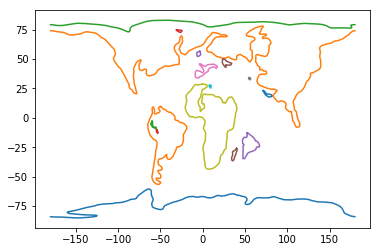

In [4]:
clevel = 0

reconstruction_time = 71

polygon_list = []
    
polygons = grdcontour2feature(grdfile_template % reconstruction_time,clevel)

for polygon in polygons:
    polygon.set_valid_time(reconstruction_time+0.5,reconstruction_time-0.4999)
    polygon_list.append(polygon)
    
#pygplates.FeatureCollection(polygon_list).write('paleoshorelines_M2016.gpmlz')
    
for polygon in polygons:
    
    plt.plot(polygon.get_geometry().to_lat_lon_array()[:,1],polygon.get_geometry().to_lat_lon_array()[:,0])
    

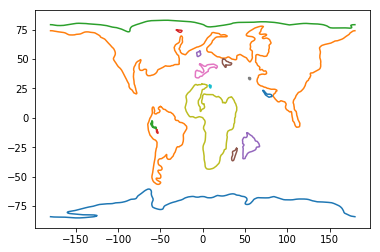

In [6]:
from call_system_command import call_system_command

reconstruction_time = 71

call_system_command(['gmt',
                     'grdcontour',
                     grdfile_template % reconstruction_time,
                     '-C10000',
                     '-Dcontour_%c.txt',
                     '-V'])
    
f = open('./contour_C.txt', 'r')

polygons = []
contourlist = []
for line in f:
    if line[0] == '>':
        if len(contourlist)>0:
            polygons.append(contourlist)
        contourlist = []
    else:
        line = line.split()
        contourlist.append([float(j) for j in line])
        #break
            
for p in polygons:
    plt.plot(zip(*p)[0],zip(*p)[1])

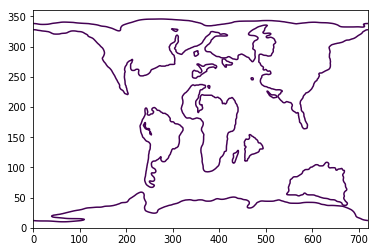

In [40]:
plt.contour(ptopo.gridZ, levels=[0])
